# Chapter 24

# Augmented Reality with OpenCV II

1. Augmented Reality

## Augmented Reality

## Markerless-based Augmented Reality

### Feature detection

#### ORB keypoint detector

First extracted descriptor: [  2 141   2 158  20 131 170 230  22   1  88   2 104 234  48  64 121 107
  19 193  34 184   8 255  32  54 138 136  20  14  49 136]


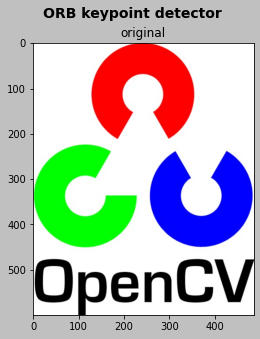

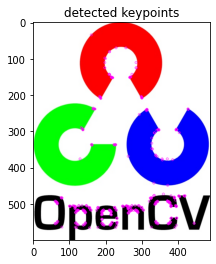

In [1]:
import cv2 as cv
from matplotlib import pyplot as plt


# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(12, 5))
plt.suptitle("ORB keypoint detector", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Load test image:
image = cv.imread('../samples/data/opencv_logo_with_text.png')

# Initiate ORB detector:
orb = cv.ORB_create()

# Detect the keypoints using ORB:
keypoints = orb.detect(image, None)

# Compute the descriptors of the detected keypoints:
keypoints, descriptors = orb.compute(image, keypoints)

# Print one ORB descriptor:
print("First extracted descriptor: {}".format(descriptors[0]))

# Draw detected keypoints:
image_keypoints = cv.drawKeypoints(image, keypoints, None, color=(255, 0, 255), flags=0)

# Plot the images:
# Convert BGR image to RGB
imgRGB = image[:, :, ::-1]

plt.imshow(imgRGB)
plt.title('original')
plt.show()

# Convert BGR image to RGB
imgRGB = image_keypoints[:, :, ::-1]
plt.imshow(imgRGB)
plt.title('detected keypoints')

# Show the Figure:
plt.show()

### Feature Matching

- Brute-Force (BF) matcher
- Fast Library for Approximate Nearest Neighbors (FLANN) matcher

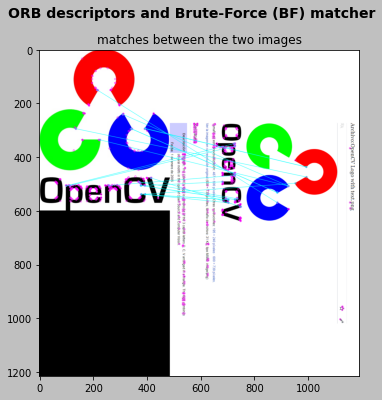

In [2]:
# Import required packages:
import cv2 as cv
from matplotlib import pyplot as plt


# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(8, 6))
plt.suptitle("ORB descriptors and Brute-Force (BF) matcher", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Load the 'query' and 'scene' image:
image_query = cv.imread('../samples/data/opencv_logo_with_text.png')
image_scene = cv.imread('../samples/data/opencv_logo_with_text_scene.png')

# Initiate ORB detector:
orb = cv.ORB_create()

# Detect the keypoints and compute the descriptors with ORB:
keypoints_1, descriptors_1 = orb.detectAndCompute(image_query, None)
keypoints_2, descriptors_2 = orb.detectAndCompute(image_scene, None)

# Create BFMatcher object
# First parameter sets the distance measurement (by default it is cv.NORM_L2)
# The second parameter crossCheck (which is False by default) can be set to True in order to return only
# consistent pairs in the matching process (the two features in both sets should match each other)
bf_matcher = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors:
bf_matches = bf_matcher.match(descriptors_1, descriptors_2)

# Sort the matches in the order of their distance:
bf_matches = sorted(bf_matches, key=lambda x: x.distance)

# Draw first 20 matches:
result = cv.drawMatches(image_query, keypoints_1, image_scene, keypoints_2, bf_matches[:20], None,
                         matchColor=(255, 255, 0), singlePointColor=(255, 0, 255), flags=0)

# Plot the images:
# Convert BGR image to RGB
imgRGB = result[:, :, ::-1]

plt.imshow(imgRGB)
plt.title("matches between the two images")

# show
plt.show()

### Object Recognition

Once the features are matched, the next step is to find a perspective transformation between the location of the matched keypoints in the two images using the   

    cv.findHomography()

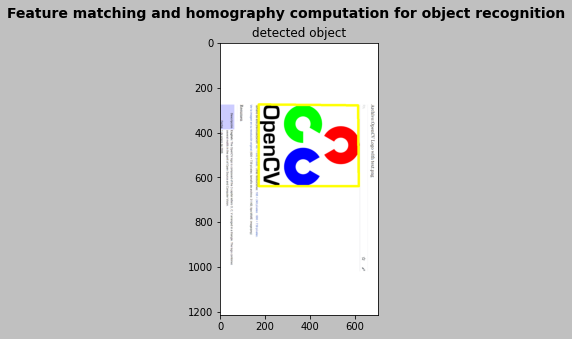

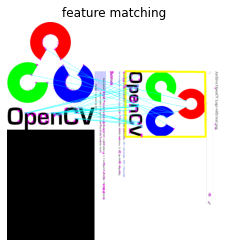

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


# Load the 'query' and 'scene' image:
image_query = cv.imread('../samples/data/opencv_logo_with_text.png')
image_scene = cv.imread('../samples/data/opencv_logo_with_text_scene.png')

# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(14, 5))
plt.suptitle("Feature matching and homography computation for object recognition", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Initiate ORB detector:
orb = cv.ORB_create()

# Detect the keypoints and compute the descriptors with ORB:
keypoints_1, descriptors_1 = orb.detectAndCompute(image_query, None)
keypoints_2, descriptors_2 = orb.detectAndCompute(image_scene, None)

# Create BFMatcher object
# First parameter sets the distance measurement (by default it is cv.NORM_L2)
# The second parameter crossCheck (which is False by default) can be set to True in order to return only
# consistent pairs in the matching process (the two features in both sets should match each other)
bf_matcher = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors:
bf_matches = bf_matcher.match(descriptors_1, descriptors_2)

# Sort the matches in the order of their distance:
bf_matches = sorted(bf_matches, key=lambda x: x.distance)
best_matches = bf_matches[:40]

# Extract the matched keypoints:
pts_src = np.float32([keypoints_1[m.queryIdx].pt for m in best_matches]).reshape(-1, 1, 2)
pts_dst = np.float32([keypoints_2[m.trainIdx].pt for m in best_matches]).reshape(-1, 1, 2)

# Find homography matrix:
M, mask = cv.findHomography(pts_src, pts_dst, cv.RANSAC, 5.0)

# Get the corner coordinates of the 'query' image:
h, w = image_query.shape[:2]
pts_corners_src = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)

# Perform perspective transform using the previously calculated matrix and the corners of the 'query' image
# to get the corners of the 'detected' object in the 'scene' image:
pts_corners_dst = cv.perspectiveTransform(pts_corners_src, M)

# Draw corners of the detected object:
img_obj = cv.polylines(image_scene, [np.int32(pts_corners_dst)], True, (0, 255, 255), 10)

# Draw matches:
img_matching = cv.drawMatches(image_query, keypoints_1, img_obj, keypoints_2, best_matches, None,
                               matchColor=(255, 255, 0), singlePointColor=(255, 0, 255), flags=0)

# Plot the images:
# Convert BGR image to RGB
imgRGB = img_obj[:, :, ::-1]

plt.imshow(imgRGB)
plt.title("detected object")
# plt.axis('off')
# Show the Figure:
plt.show()

# Convert BGR image to RGB
imgRGB = img_matching[:, :, ::-1]

plt.imshow(imgRGB)
plt.title("feature matching")
plt.axis('off')
# Show the Figure:
plt.show()

## Marker-based Augmented Reality

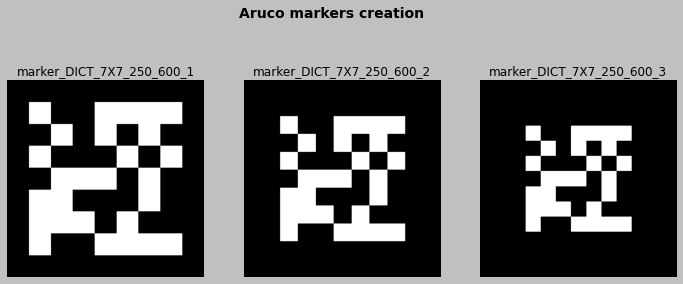

In [8]:

# Import required packages
import cv2 as cv
from matplotlib import pyplot as plt


def show_img_with_matplotlib(color_img, title, pos):
    """ Shows an image using matplotlib capabilities """

    # Convert BGR image to RGB
    imgRGB = color_img[:, :, ::-1]

    ax = plt.subplot(1, 3, pos)
    plt.imshow(imgRGB)
    plt.title(title)
    plt.axis('off')


# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(12, 5))
plt.suptitle("Aruco markers creation", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# The first step is to create the dictionary object. Aruco has some predefined dictionaries.
# (DICT_4X4_100, DICT_4X4_1000, DICT_4X4_250, DICT_4X4_50 = 0, .... , DICT_7X7_1000)
# We are going to create a dictionary, which is composed by 250 markers.
# Each marker will be of 7x7 bits (DICT_7X7_250):
aruco_dictionary = cv.aruco.Dictionary_get(cv.aruco.DICT_7X7_250)

# Now we can draw a marker using 'cv.aruco.drawMarker()'.
# The function 'cv.aruco.drawMarker()' returns the marker image ready to be printed (in a canonical form)
# The first parameter is the dictionary object 'aruco_dictionary' we have created previously
# using 'cv.aruco.Dictionary_get()'
# The second parameter is the marker id, which ranges between 0 and 249 (our dictionary has 250 markers)
# The third parameter is the size of the image to be drawn. in this case, the marker will have a size of 600x600 pixels
# The fourth (optional, by default 1) parameter is the number of bits in marker borders
aruco_marker_1 = cv.aruco.drawMarker(dictionary=aruco_dictionary, id=2, sidePixels=600, borderBits=1)
aruco_marker_2 = cv.aruco.drawMarker(dictionary=aruco_dictionary, id=2, sidePixels=600, borderBits=2)
aruco_marker_3 = cv.aruco.drawMarker(dictionary=aruco_dictionary, id=2, sidePixels=600, borderBits=3)

# We save the created markers using 'cv.imwrite()':
cv.imwrite("marker_DICT_7X7_250_600_1.png", aruco_marker_1)
cv.imwrite("marker_DICT_7X7_250_600_2.png", aruco_marker_2)
cv.imwrite("marker_DICT_7X7_250_600_3.png", aruco_marker_3)

# Plot the images:
show_img_with_matplotlib(cv.cvtColor(aruco_marker_1, cv.COLOR_GRAY2BGR), "marker_DICT_7X7_250_600_1", 1)
show_img_with_matplotlib(cv.cvtColor(aruco_marker_2, cv.COLOR_GRAY2BGR), "marker_DICT_7X7_250_600_2", 2)
show_img_with_matplotlib(cv.cvtColor(aruco_marker_3, cv.COLOR_GRAY2BGR), "marker_DICT_7X7_250_600_3", 3)

# Show the Figure:
plt.show()

In [10]:
import cv2 as cv

# We create the dictionary object:
aruco_dictionary = cv.aruco.Dictionary_get(cv.aruco.DICT_7X7_250)

# We create the parameters object:
parameters = cv.aruco.DetectorParameters_create()

# Create video capture object 'capture' to be used to capture frames from the first connected camera:
capture = cv.VideoCapture(1)

while True:
    # Capture frame by frame from the video capture object 'capture':
    ret, frame = capture.read()

    # We convert the frame to grayscale:
    gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    # We call the function 'cv.aruco.detectMarkers()'
    # The first parameter is the image where the markers are going to be detected
    # The second parameter is the dictionary object
    # The third parameter establishes all the parameters that can be customized during the detection process
    # Returns list of corners and identifiers of the detected markers and list of rejected candidates
    corners, ids, rejected_corners = cv.aruco.detectMarkers(gray_frame, aruco_dictionary, parameters=parameters)

    # Draw detected markers:
    frame = cv.aruco.drawDetectedMarkers(image=frame, corners=corners, ids=ids, borderColor=(0, 255, 0))

    # Draw rejected markers:
    frame = cv.aruco.drawDetectedMarkers(image=frame, corners=rejected_corners, borderColor=(0, 0, 255))

    # Display the resulting frame
    cv.imshow('frame', frame)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything:
capture.release()
cv.destroyAllWindows()

### Draw Square

In [1]:
import cv2 as cv
import os
import pickle
import numpy as np

OVERLAY_SIZE_PER = 1

# Check for camera calibration data
if not os.path.exists('./calibration.pckl'):
    print("You need to calibrate the camera before")
    exit()
else:
    f = open('calibration.pckl', 'rb')
    cameraMatrix, distCoeffs = pickle.load(f)
    f.close()
    if cameraMatrix is None or distCoeffs is None:
        print("Something went wrong. Recalibrate the camera")
        exit()


def draw_points(img, pts):
    """ Draw the points in the image"""

    pts = np.int32(pts).reshape(-1, 2)

    img = cv.drawContours(img, [pts], -1, (255, 255, 0), -3)

    for p in pts:
        cv.circle(img, (p[0], p[1]), 5, (255, 0, 255), -1)

    return img


# Create the dictionary object and the parameters:
aruco_dictionary = cv.aruco.Dictionary_get(cv.aruco.DICT_7X7_250)
parameters = cv.aruco.DetectorParameters_create()

# Create video capture object 'capture' to be used to capture frames from the first connected camera:
capture = cv.VideoCapture(1)

while True:
    # Capture frame by frame from the video capture object 'capture':
    ret, frame = capture.read()

    # We convert the frame to grayscale:
    gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    # Detect markers:
    corners, ids, rejectedImgPoints = cv.aruco.detectMarkers(gray_frame, aruco_dictionary, parameters=parameters)

    # Draw detected markers:
    frame = cv.aruco.drawDetectedMarkers(image=frame, corners=corners, ids=ids, borderColor=(0, 255, 0))

    # Draw rejected markers:
    # frame = cv.aruco.drawDetectedMarkers(image=frame, corners=rejectedImgPoints, borderColor=(0, 0, 255))

    if ids is not None:
        # rvecs and tvecs are the rotation and translation vectors respectively, for each of the markers in corners.
        rvecs, tvecs, _ = cv.aruco.estimatePoseSingleMarkers(corners, 1, cameraMatrix, distCoeffs)

        for rvec, tvec in zip(rvecs, tvecs):
            # Note: The marker coordinate system is centered on the center of the marker
            # The coordinates of the four corners of the marker (in its own coordinate system) are:
            # 1: (-markerLength/2, markerLength/2, 0)
            # 2: (markerLength/2, markerLength/2, 0)
            # 3: (markerLength/2, -markerLength/2, 0)
            # 4: (-markerLength/2, -markerLength/2, 0)
            # Define the points where you want the image to be overlaid (remember: marker coordinate system):
            desired_points = np.float32(
                [[-1 / 2, 1 / 2, 0], [1 / 2, 1 / 2, 0], [1 / 2, -1 / 2, 0], [-1 / 2, -1 / 2, 0]]) * OVERLAY_SIZE_PER

            # Project the points:
            projected_desired_points, jac = cv.projectPoints(desired_points, rvecs, tvecs, cameraMatrix, distCoeffs)

            # Draw the projected points (debugging):
            draw_points(frame, projected_desired_points)

    # Display the resulting augmented frame:
    cv.imshow('frame', frame)

    # Press 'q' to exit:
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything:
capture.release()
cv.destroyAllWindows()

You need to calibrate the camera before


### Using Aruco Image Overlay

In [ ]:
import cv2 as cv
import os
import pickle
import numpy as np

OVERLAY_SIZE_PER = 1

# Check for camera calibration data
if not os.path.exists('./calibration.pckl'):
    print("You need to calibrate the camera before")
    exit()
else:
    f = open('calibration.pckl', 'rb')
    cameraMatrix, distCoeffs = pickle.load(f)
    f.close()
    if cameraMatrix is None or distCoeffs is None:
        print("Something went wrong. Recalibrate the camera")
        exit()

# Load the image overlay:
overlay = cv.imread("tree_overlay.png")


def draw_points(img, pts):
    """ Draw the points in the image"""

    pts = np.int32(pts).reshape(-1, 2)

    # img = cv.drawContours(img, [pts], -1, (255, 255, 0), -3)

    for p in pts:
        cv.circle(img, (p[0], p[1]), 5, (255, 0, 255), -1)

    return img


def draw_augmented_overlay(pts_1, overlay_image, image):
    """Overlay the image 'overlay_image' onto the image 'image'"""

    # Define the squares of the overlay_image image to be drawn:
    pts_2 = np.float32([[0, 0], [overlay_image.shape[1], 0], [overlay_image.shape[1], overlay_image.shape[0]],
                        [0, overlay_image.shape[0]]])

    # Draw border to see the limits of the image:
    cv.rectangle(overlay_image, (0, 0), (overlay_image.shape[1], overlay_image.shape[0]), (255, 255, 0), 10)

    # Create the transformation matrix:
    M = cv.getPerspectiveTransform(pts_2, pts_1)

    # Transform the overlay_image image using the transformation matrix M:
    dst_image = cv.warpPerspective(overlay_image, M, (image.shape[1], image.shape[0]))
    # cv.imshow("dst_image", dst_image)

    # Create the mask:
    dst_image_gray = cv.cvtColor(dst_image, cv.COLOR_BGR2GRAY)
    ret, mask = cv.threshold(dst_image_gray, 0, 255, cv.THRESH_BINARY_INV)

    # Compute bitwise conjunction using the calculated mask:
    image_masked = cv.bitwise_and(image, image, mask=mask)
    # cv.imshow("image_masked", image_masked)

    # Add the two images to create the resulting image:
    result = cv.add(dst_image, image_masked)
    return result


# Create the dictionary object and the parameters:
aruco_dictionary = cv.aruco.Dictionary_get(cv.aruco.DICT_7X7_250)
parameters = cv.aruco.DetectorParameters_create()

# Create video capture object 'capture' to be used to capture frames from the first connected camera:
capture = cv.VideoCapture(0)

while True:
    # Capture frame by frame from the video capture object 'capture':
    ret, frame = capture.read()

    # We convert the frame to grayscale:
    gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    # Detect markers:
    corners, ids, rejectedImgPoints = cv.aruco.detectMarkers(gray_frame, aruco_dictionary, parameters=parameters)

    # Draw detected markers:
    frame = cv.aruco.drawDetectedMarkers(image=frame, corners=corners, ids=ids, borderColor=(0, 255, 0))

    # Draw rejected markers:
    # frame = cv.aruco.drawDetectedMarkers(image=frame, corners=rejectedImgPoints, borderColor=(0, 0, 255))

    if ids is not None:
        # rvecs and tvecs are the rotation and translation vectors respectively, for each of the markers in corners.
        rvecs, tvecs, _ = cv.aruco.estimatePoseSingleMarkers(corners, 1, cameraMatrix, distCoeffs)

        for rvec, tvec in zip(rvecs, tvecs):
            # Note: The marker coordinate system is centered on the center of the marker
            # The coordinates of the four corners of the marker (in its own coordinate system) are:
            # 1: (-markerLength/2, markerLength/2, 0)
            # 2: (markerLength/2, markerLength/2, 0)
            # 3: (markerLength/2, -markerLength/2, 0)
            # 4: (-markerLength/2, -markerLength/2, 0)
            # Define the points where you want the image to be overlaid (remember: marker coordinate system):
            desired_points = np.float32(
                [[-1 / 2, 1 / 2, 0], [1 / 2, 1 / 2, 0], [1 / 2, -1 / 2, 0], [-1 / 2, -1 / 2, 0]]) * OVERLAY_SIZE_PER

            # Project the points:
            projected_desired_points, jac = cv.projectPoints(desired_points, rvecs, tvecs, cameraMatrix, distCoeffs)

            # Overlay the image:
            frame = draw_augmented_overlay(projected_desired_points, overlay, frame)

            # Draw the projected points (debugging):
            draw_points(frame, projected_desired_points)

    # Display the resulting augmented frame:
    cv.imshow('frame', frame)

    # Press 'q' to exit:
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything:
capture.release()
cv.destroyAllWindows()

### Detect QR

Decoded Data: 'https://github.com/PacktPublishing/Mastering-OpenCV-4-with-Python'


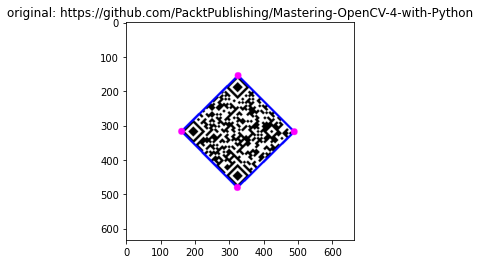

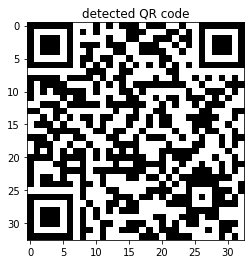

In [18]:
"""
QR code detection
"""

# Import required packages:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt



# Load input image:
img = cv.imread("../samples/data/qrcode_rotate_45_image.png")

# Create QR code detector:
qr_code_detector = cv.QRCodeDetector()

# Detect and decode the QR code using qr_code_detector.detectAndDecode()
# This function returns the data, the array of vertices of the found QR code quadrangle and
# the image containing the rectified binarized QR code:
data, vertices, rectified_qr_code_binarized = qr_code_detector.detectAndDecode(img)

if len(data) > 0:
    print("Decoded Data: '{}'".format(data))

    # Show the detection in the image:
    pts = np.int32(vertices).reshape(-1, 2)

    for j in range(pts.shape[0]):
        cv.line(img, tuple(pts[j]), tuple(pts[(j + 1) % pts.shape[0]]), (255, 0, 0), 5)

    for j in range(pts.shape[0]):
        cv.circle(img, tuple(pts[j]), 10, (255, 0, 255), -1)

    # Convert BGR image to RGB
    imgRGB = img[:, :, ::-1]
    plt.imshow(imgRGB)
    plt.title("original: " + data)    
    # Show the Figure:
    plt.show()


    # Convert binarized image to uint8:
    rectified_image = np.uint8(rectified_qr_code_binarized)
    rectified_image = cv.cvtColor(rectified_image, cv.COLOR_GRAY2BGR)

    # Plot the images:
    # Convert BGR image to RGB
    imgRGB = rectified_image[:, :, ::-1]
    plt.imshow(imgRGB)
    plt.title("detected QR code")
    plt.show()


else:
    print("QR Code not detected")

## Class Activity

1. Create a QR code from any app.
2. Load the created QR code detect and print the data.

## Snapchat-based Augmented Reality

In [19]:
"""
Snapchat-based augmented reality OpenCV moustache overlay
"""

# Import required packages:
import cv2 as cv

# Load cascade classifiers for face and nose detection:
face_cascade = cv.CascadeClassifier("../samples/data/haarcascade_frontalface_default.xml")
nose_cascade = cv.CascadeClassifier("../samples/data/haarcascade_mcs_nose.xml")

# Load moustache image. The parameter -1 reads also de alpha channel
# Open 'moustaches.sgv' to see more moustaches that can be used
# Therefore, the loaded image has four channels (Blue, Green, Red, Alpha):
img_moustache = cv.imread('../samples/data/moustache.png', -1)

# Create the mask for the moustache:
img_moustache_mask = img_moustache[:, :, 3]
# cv.imshow("img moustache mask", img_moustache_mask)

# You can use a test image to adjust the ROIS:
# test_face = cv.imread("../samples/data/face_test.png")
test_face = cv.imread("assets/numan_face.png")
test_face = cv.resize(test_face, None, fx=2, fy=2, interpolation=cv.INTER_AREA)

# Convert moustache image to BGR (eliminate alpha channel):
img_moustache = img_moustache[:, :, 0:3]

# Create VideoCapture object to get images from the webcam:
video_capture = cv.VideoCapture(0)

while True:
    # Capture frame from the VideoCapture object:
    ret, frame = video_capture.read()

    # Just for debugging purposes and to adjust the ROIS:
    frame = test_face.copy()

    # Convert frame to grayscale:
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    # Detect faces using the function 'detectMultiScale'
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Iterate over each detected face:
    for (x, y, w, h) in faces:
        # Draw a rectangle to see the detected face (debugging purposes):
        # cv.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 0), 2)

        # Create the ROIS based on the size of the detected face:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]

        # Detects a nose inside the detected face:
        noses = nose_cascade.detectMultiScale(roi_gray)

        for (nx, ny, nw, nh) in noses:
            # Draw a rectangle to see the detected nose (debugging purposes):
            # cv.rectangle(roi_color, (nx, ny), (nx + nw, ny + nh), (255, 0, 255), 2)

            # Calculate the coordinates where the moustache will be placed:
            x1 = int(nx - nw / 2)
            x2 = int(nx + nw / 2 + nw)
            y1 = int(ny + nh / 2 + nh / 8)
            y2 = int(ny + nh + nh / 4 + nh / 6)

            if x1 < 0 or x2 < 0 or x2 > w or y2 > h:
                continue

            # Draw a rectangle to see where the moustache will be placed (debugging purposes):
            # cv.rectangle(roi_color, (x1, y1), (x2, y2), (255, 0, 0), 2)

            # Calculate the width and height of the image with the moustache:
            img_moustache_res_width = int(x2 - x1)
            img_moustache_res_height = int(y2 - y1)

            # Resize the mask to be equal to the region were the glasses will be placed:
            mask = cv.resize(img_moustache_mask, (img_moustache_res_width, img_moustache_res_height))

            # Create the invert of the mask:
            mask_inv = cv.bitwise_not(mask)

            # Resize img_glasses to the desired (and previously calculated) size:
            img = cv.resize(img_moustache, (img_moustache_res_width, img_moustache_res_height))

            # Take ROI from the BGR image:
            roi = roi_color[y1:y2, x1:x2]

            # Create ROI background and ROI foreground:
            roi_bakground = cv.bitwise_and(roi, roi, mask=mask_inv)
            roi_foreground = cv.bitwise_and(img, img, mask=mask)

            # Show both roi_bakground and roi_foreground (debugging purposes):
            # cv.imshow('roi_bakground', roi_bakground)
            # cv.imshow('roi_foreground', roi_foreground)

            # Add roi_bakground and roi_foreground to create the result:
            res = cv.add(roi_bakground, roi_foreground)

            # Set res into the color ROI:
            roi_color[y1:y2, x1:x2] = res

            break

    # Display the resulting frame:
    cv.imshow('Snapchat-based OpenCV moustache overlay', frame)

    # Press any key to exit:
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything:
video_capture.release()
cv.destroyAllWindows()

## Class Activity

1. Attach an image to a moustach area of a face.

### Glasses

In [13]:
"""
Snapchat-based augmented reality OpenCV glasses overlay
"""

# Import required packages:
import cv2 as cv

# Load cascade classifiers for face and eyepair detection:
face_cascade = cv.CascadeClassifier("../samples/data/haarcascade_frontalface_default.xml")
eyepair_cascade = cv.CascadeClassifier("../samples/data/haarcascade_mcs_eyepair_big.xml")

# Load glasses image. The parameter -1 reads also de alpha channel (if exists)
# Open 'glasses.sgv' to see more glasses that can be used
# Therefore, the loaded image has four channels (Blue, Green, Red, Alpha):
img_glasses = cv.imread('../samples/data/glasses.png', -1)

# Create the mask for the glasses:
img_glasses_mask = img_glasses[:, :, 3]
# cv.imshow("img glasses mask", img_glasses_mask)

# Convert glasses image to BGR (eliminate alpha channel):
img_glasses = img_glasses[:, :, 0:3]

# You can use a test image to adjust the ROIS:
# test_face = cv.imread("../samples/data/face_test.png")
test_face = cv.imread("assets/numan_face.png")

# Create VideoCapture object to get images from the webcam:
video_capture = cv.VideoCapture(0)

while True:
    # Capture frame from the VideoCapture object:
    ret, frame = video_capture.read()

    # Just for debugging purposes and to adjust the ROIS:
    frame = test_face.copy()

    # Convert frame to grayscale:
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    # Detect faces using the function 'detectMultiScale()'
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Iterate over each detected face:
    for (x, y, w, h) in faces:
        # Draw a rectangle to see the detected face (debugging purposes):
        # cv.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 0), 2)

        # Create the ROIS based on the size of the detected face:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]

        # Detect the eyepair inside the detected face:
        eyepairs = eyepair_cascade.detectMultiScale(roi_gray)

        # Iterate over the detected eyepairs (inside the face):
        for (ex, ey, ew, eh) in eyepairs:
            # Draw a rectangle to see the detected eyepair (debugging purposes):
            # cv.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (255, 0, 255), 2)

            # Calculate the coordinates where the glasses will be placed:
            x1 = int(ex - ew / 10)
            x2 = int((ex + ew) + ew / 10)
            y1 = int(ey)
            y2 = int(ey + eh + eh / 2)

            if x1 < 0 or x2 < 0 or x2 > w or y2 > h:
                continue

            # Draw a rectangle to see where the glasses will be placed (debugging purposes):
            # cv.rectangle(roi_color, (x1, y1), (x2, y2), (0, 255, 255), 2)

            # Calculate the width and height of the image with the glasses:
            img_glasses_res_width = int(x2 - x1)
            img_glasses_res_height = int(y2 - y1)

            # Resize the mask to be equal to the region were the glasses will be placed:
            mask = cv.resize(img_glasses_mask, (img_glasses_res_width, img_glasses_res_height))

            # Create the invert of the mask:
            mask_inv = cv.bitwise_not(mask)

            # Resize img_glasses to the desired (and previously calculated) size:
            img = cv.resize(img_glasses, (img_glasses_res_width, img_glasses_res_height))

            # Take ROI from the BGR image:
            roi = roi_color[y1:y2, x1:x2]

            # Create ROI background and ROI foreground:
            roi_bakground = cv.bitwise_and(roi, roi, mask=mask_inv)
            roi_foreground = cv.bitwise_and(img, img, mask=mask)

            # Show both roi_bakground and roi_foreground (debugging purposes):
            # cv.imshow('roi_bakground', roi_bakground)
            # cv.imshow('roi_foreground', roi_foreground)

            # Add roi_bakground and roi_foreground to create the result:
            res = cv.add(roi_bakground, roi_foreground)

            # Set res into the color ROI:
            roi_color[y1:y2, x1:x2] = res

            break

    # Display the resulting frame
    cv.imshow('Snapchat-based OpenCV glasses filter', frame)

    # Press any key to exit
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything:
video_capture.release()
cv.destroyAllWindows()

## Class Activity

1. Attach an object to the eye of a face.